# 1 Import libraries

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3

from wordcloud import WordCloud


# Comments on the document

In [2]:
######## 
# This is Elisa's Code from 2023-06-02

# loaded dataset (subset of original dataset and pre-processed)
# df = pd.read_pickle("df_modeling.pkl")




#######

# Classification on Text Variables of our Data
# for text analysis:
# retrieve 2 columns title and content

# before fitting: vectorize with TF-IDF Vectorizer + clean text / remove stop_words 



#######################################################

# 1 MAJOR ANALYSIS CHAPTER IN THIS NOTEBOOK

##############################


# ANALYSIS 1: 3 CLASSES

#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error
# Gradient Boosting --> takes too long
# CatBoost --> takes too long
# XGBoost --> takes too long


# KNN --> takes 2 hours; only ran once, not again
# SVM --> takes 3,5 hours; only ran once, not again
# Logistic Regression


### Results
## LightGBM vect accuracy score : 0.5466462876961966
# Naive Bayes Bernoulli vect accuracy score : 0.5710422667685615
# Naive Bayes Multinomial vect accuracy score : 0.6023749338663218
# Naive Bayes Complement vect accuracy score : 0.6515783904532362

# Logistic Regression vect accuracy score : 0.7239433307859621





# CREATE NEW NOTEBOOK FOR THAT!

##############################

# ANALYSIS 2: 2 CLASSES

#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error
# Gradient Boosting --> takes 2 hours
# CatBoost
# XGBoost


# KNN --> takes 2 hours; only ran once, not again
# SVM --> takes 3,5 hours; only ran once, not again
# Logistic Regression


### Results
# LightGBM vect accuracy score : 0.5588148844865087
# Naive Bayes Bernoulli vect accuracy score : 0.549820704250191
# Naive Bayes Multinomial vect accuracy score : 0.5930280406795603
# Naive Bayes Complement vect accuracy score : 0.6222444300746576
# Gradient Boosting vect accuracy score: 0.3739932984539416
# CatBoost
# XGBoost

# KNN
# SVM
# Logistic Regression vect accuracy score : 0.724589971195109


# LOADING PREPROCESSED DATASET df_modeling.pkl

In [2]:
# retrieve dataset
df = pd.read_pickle("df_modeling.pkl")

In [3]:
df.head(5)

,id,source,title,content,url,published_utc,label,factuality,questionable-source,conspiracy-pseudoscience,...,Russia,USA,United Kingdom,Unknown,tokenized_content,tok_content_length,tokenized_title,tok_title_length,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,1.0,2.0,0.0,1.0,...,0,1,0,0,"[It, ’, s, been, noted, how, the, fanatical, n...",128,"[An, Unsettling, Realization, :, ‘, Mask, Zeal...",11,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Episode, #, 416, of, SUNDAY, WIRE, SHOW, resu...",221,"[Episode, #, 416, –, ‘, Soldiers, of, Fortune,...",14,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,https://21stcenturywire.com/2022/07/15/ukc-new...,1657916785,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Authoritarians, in, the, UK, government, are,...",251,"[UKC, News, :, UK, Thought, Police, ,, France,...",16,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",https://21stcenturywire.com/2022/05/22/twitter...,1653236268,1.0,2.0,0.0,1.0,...,0,1,0,0,"[After, the, 2020, election, ,, many, American...",630,"[Twitter, Audit, Finds, Half, of, President, B...",13,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,https://21stcenturywire.com/2022/03/11/ukc-new...,1647044296,1.0,2.0,0.0,1.0,...,0,1,0,0,"[The, high, stakes, game, surrounding, the, Uk...",167,"[UKC, News, :, The, Truth, About, US, Bio, Lab...",15,908,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   label                     85051 non-null  float64
 7   factuality                85051 non-null  float64
 8   questionable-source       85051 non-null  float64
 9   conspiracy-pseudoscience  85051 non-null  float64
 10  pro-science               85051 non-null  float64
 11  year                      85051 non-null  int64  
 12  month                     85051 non-null  int64  
 13  dayofyear                 85051 non-null  int64  
 14  dayof

In [6]:
# inspect labels
# df["label"].value_counts()


0.0    36636
1.0    26542
2.0    21873
Name: label, dtype: int64

In [7]:
### DELETE 2 in labels (delete 21873 rows)
# df = df[df["label"] != 2]


In [8]:
# inspect labels
# df["label"].value_counts()

# 0.0    36636
# 1.0    26542

0.0    36636
1.0    26542
Name: label, dtype: int64

# Create ML Models on text data (TF-IDF VECTORIZING WITHOUT STOPWORDS)


In [ ]:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian
# GradientBoosting --> takes too long
# CatBoost --> takes too long
# XGBoost --> takes too long

# KNN --> takes too long
# SVM --> takes too long
# Logistic Regression


# Remove Stop Words 

In [6]:
import nltk
from nltk.corpus import stopwords

# Download stopwords corpus if not already downloaded
nltk.download('stopwords')

# Load the stopwords
stop_words = set(stopwords.words('english'))  # You can choose a different language if needed

# Update stop words variable
# stop_words.update([",", "."])

additional_words = ["?", "!", ".", ",", ":", ";", "-", "--", "...", '"', "'"]
stop_words.update(set(additional_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# show stop words
print(stop_words)


{'aren', 'against', 'during', 'into', 'out', 'than', "didn't", 'needn', 'other', 'my', 'having', "shouldn't", 'me', 'did', ':', 'as', 'to', 'hadn', "hadn't", 'wouldn', '"', "wasn't", 'own', 'doing', 'what', 'were', "won't", 'will', "shan't", 'being', 'by', 'has', "mustn't", 'through', 'under', 'didn', "'", 'which', 'when', 'i', 'been', 'who', 'again', 'haven', 'up', 'his', 'its', 'off', 'll', 'yours', '.', 'they', 'won', "haven't", 'shouldn', 'have', "mightn't", 'we', 're', 'before', 'herself', 'over', ';', 'these', 'same', 'it', 'be', 'weren', 'is', 'on', "hasn't", 'wasn', 'if', 'so', 've', 'this', 'their', '?', 'for', 'until', 'that', 'such', 'then', 'more', 's', 'both', 'too', "weren't", 'our', 'him', "needn't", 'below', 'you', 'mustn', 'itself', 'at', 'he', 'after', 'why', 'hasn', 'a', "should've", 'the', "you'll", 'ourselves', 'down', 'with', "doesn't", 'her', 'from', 'ain', 'isn', 'ma', 'very', 'not', ',', 'should', 'above', 'here', 'o', "you've", 'had', 'about', "wouldn't", 'mig

In [8]:
# contne tbfeore removing stop words
df["content"][:10]


0    It’s been noted how the fanatical nature of ma...
1    Episode #416 of SUNDAY WIRE SHOW resumes this ...
2    Authoritarians in the UK government are gettin...
3    After the 2020 election, many Americans began ...
4    The high stakes game surrounding the Ukraine c...
5    On the February 3, 2022 episode of Patrick Hen...
6    These are the darkest, most difficult days in ...
7    A shocking new trend is on the move in America...
8    In this episode of the Patrick Henningsen Show...
9    Liz Cheney invokes Ronald Reagan to bash those...
Name: content, dtype: object

In [9]:
# Apply
df['content_cleaned'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [21]:
df["content_cleaned"][:10]


0    It’s noted fanatical nature masking proponents...
1    Episode #416 SUNDAY WIRE SHOW resumes week, Ap...
2    Authoritarians UK government getting increasin...
3    2020 election, many Americans began question m...
4    high stakes game surrounding Ukraine conflict ...
5    February 3, 2022 episode Patrick Henningsen Sh...
6    darkest, difficult days human history. facing ...
7    shocking new trend move America: following his...
8    episode Patrick Henningsen Show TNT Radio aire...
9    Liz Cheney invokes Ronald Reagan bash GOP want...
Name: content_cleaned, dtype: object

# Lemmatize / Stem
# Takes long
# did not run it

In [11]:
# import nltk
# from nltk.stem import WordNetLemmatizer, PorterStemmer

In [19]:
# Download necessary resources
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...


True

In [13]:
# Initialize lemmatizer and stemmer
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()


In [ ]:
# Apply
# takes XXX minutes 
# df['content_clean_lem_stem'] = df['content_cleaned'].apply(lambda x: ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in x.split()]))

In [ ]:
# df["content_clean_lem_stem"][:10]


# Create X and Y (only title and text)
# X_train_text, X_test_text, Y_train, Y_test (uppercase letters)


In [23]:
# STEP 1: DEFINE X and Y
X = df.drop("label", axis=1)
Y = df["label"]


In [24]:
X.columns = X.columns.astype(str)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   factuality                85051 non-null  float64
 7   questionable-source       85051 non-null  float64
 8   conspiracy-pseudoscience  85051 non-null  float64
 9   pro-science               85051 non-null  float64
 10  year                      85051 non-null  int64  
 11  month                     85051 non-null  int64  
 12  dayofyear                 85051 non-null  int64  
 13  dayofthemonth             85051 non-null  int64  
 14  weekd

## Create Train / Test Datasets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Vectorizing

### TFIDF Vectorizing
### USING CONTENT_CLEANED AND TITLE ONLY


In [27]:
# VECTORIZING
# TAKES 1 MINUTE

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()

vectorizer1.fit(X_train['content_cleaned'])
vectorizer2.fit(X_train['title'])


TfidfVectorizer()

In [28]:
# TAKES 1 MINUTE

X_train_content = vectorizer1.transform(X_train['content_cleaned'])
X_train_title = vectorizer2.transform(X_train['title'])
X_test_content = vectorizer1.transform(X_test['content_cleaned'])
X_test_title = vectorizer2.transform(X_test['title'])


In [29]:
X_train_text = hstack([X_train_content, X_train_title])
X_test_text = hstack([X_test_content, X_test_title])


In [30]:
X_train_text

<68040x268998 sparse matrix of type '<class 'numpy.float64'>'
	with 14853215 stored elements in Compressed Sparse Row format>

In [31]:
X_train_text.shape

(68040, 268998)

In [32]:
X_test_text

<17011x268998 sparse matrix of type '<class 'numpy.float64'>'
	with 3655613 stored elements in Compressed Sparse Row format>

In [33]:
X_test_text.shape

(17011, 268998)

# LightGBM Model

In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
# Create a LightGBM dataset for training

LightGMB_train_data_text = lgb.Dataset(X_train_text, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [37]:
# Train the LightGBM model
clf_LightGBM_vect = lgb.train(paramsLightGBM, LightGMB_train_data_text, num_boost_round=100)

# takes 3 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 12.712803 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [38]:
# Make predictions on the test set
y_pred_LightGBM_vect = clf_LightGBM_vect.predict(X_test_text)
y_pred_LightGBM_vect = [round(pred) for pred in y_pred_LightGBM_vect]  # Convert probability to binary predictions


In [39]:
# Evaluate the model
accuracy_LightGBM_vect = accuracy_score(Y_test, y_pred_LightGBM_vect)
print("Accuracy LightGBM vect:", accuracy_LightGBM_vect)

# 0.546


Accuracy LightGBM vect: 0.5466462876961966


In [40]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_LightGBM_vect = confusion_matrix(Y_test, y_pred_LightGBM_vect)

print("Confusion Matrix:\n",  conf_matrix_LightGBM_vect)


Confusion Matrix:
 [[4626 2650    0]
 [ 669 4673    0]
 [ 908 3485    0]]


In [41]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM vect classification report:\n", classification_report (Y_test, y_pred_LightGBM_vect))


LightGBM vect classification report:
               precision    recall  f1-score   support

         0.0       0.75      0.64      0.69      7276
         1.0       0.43      0.87      0.58      5342
         2.0       0.00      0.00      0.00      4393

    accuracy                           0.55     17011
   macro avg       0.39      0.50      0.42     17011
weighted avg       0.45      0.55      0.48     17011



C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Bernoulli Model

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_vect = BernoulliNB()


In [45]:
# Train the classifier
clf_Bern_vect.fit(X_train_text, Y_train)


BernoulliNB()

In [46]:
# Make predictions on the test set
y_pred_Bern_vect = clf_Bern_vect.predict(X_test_text)


In [47]:
# Evaluate the model
accuracyNB_Bernoulli_vect = accuracy_score(Y_test, y_pred_Bern_vect)
print("Accuracy:", accuracyNB_Bernoulli_vect)

# 0.57


Accuracy: 0.5710422667685615


In [48]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern_vect = confusion_matrix(Y_test, y_pred_Bern_vect)

print("Confusion Matrix:\n",  conf_matrix_Bern_vect)


Confusion Matrix:
 [[3521 2288 1467]
 [ 759 4002  581]
 [1170 1032 2191]]


In [49]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli vect classification report:\n", classification_report (Y_test, y_pred_Bern_vect))


Naive Bayes Bernoulli vect classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.48      0.55      7276
         1.0       0.55      0.75      0.63      5342
         2.0       0.52      0.50      0.51      4393

    accuracy                           0.57     17011
   macro avg       0.57      0.58      0.56     17011
weighted avg       0.58      0.57      0.57     17011



# MULTINOMIAL NAIVE BAYES


In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_vect = MultinomialNB()


In [52]:
# fit the model
clf_mult_vect.fit(X_train_text, Y_train)


MultinomialNB()

In [53]:
# get accuracy
accuracyNB_Multinomial_vect = clf_mult_vect.score(X_test_text, Y_test)
accuracyNB_Multinomial_vect

# 0.60


0.6023749338663218

In [54]:
# get confusion matrix
y_pred_NB_Multinomial_vect = clf_mult_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Multinomial_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,6858,181,237
1.0,2953,2307,82
2.0,3145,166,1082


In [55]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial Vect classification report:\n ", classification_report (Y_test, y_pred_NB_Multinomial_vect))

Naive Bayes Multinomial Vect classification report:
                precision    recall  f1-score   support

         0.0       0.53      0.94      0.68      7276
         1.0       0.87      0.43      0.58      5342
         2.0       0.77      0.25      0.37      4393

    accuracy                           0.60     17011
   macro avg       0.72      0.54      0.54     17011
weighted avg       0.70      0.60      0.57     17011



In [56]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [57]:
# create confusion matrix
cf_matrix_Multinomial_vect = confusion_matrix(Y_test, y_pred_NB_Multinomial_vect)
print(cf_matrix_Multinomial_vect)


[[6858  181  237]
 [2953 2307   82]
 [3145  166 1082]]


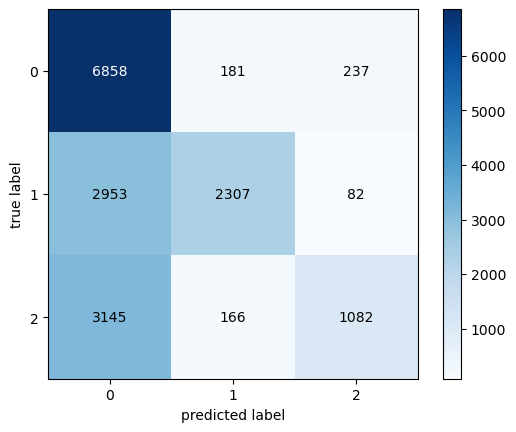

In [58]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Multinomial_vect,
                                colorbar=True)

plt.show()

<Axes: >

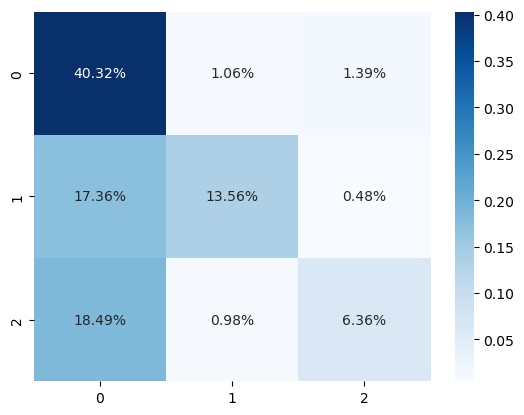

In [59]:
# percent
sns.heatmap(cf_matrix_Multinomial_vect/np.sum(cf_matrix_Multinomial_vect), annot=True, 
            fmt='.2%', cmap='Blues')

# COMPLEMENT NAIVE BAYES


In [60]:
from sklearn.naive_bayes import ComplementNB
clf_compl_vect = ComplementNB()


In [61]:
# fit model
clf_compl_vect.fit(X_train_text, Y_train)


ComplementNB()

In [62]:
# get accuracy
accuracyNB_Complement_vect = clf_compl_vect.score(X_test_text, Y_test)
accuracyNB_Complement_vect

# 0.65

0.6515783904532362

In [63]:
# get confusion matrix
y_pred_NB_Complement_vect = clf_compl_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Complement_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,5915,691,670
1.0,1656,3363,323
2.0,2163,424,1806


In [64]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement vect classification report:\n ", classification_report (Y_test, y_pred_NB_Complement_vect))


Naive Bayes Complement vect classification report:
                precision    recall  f1-score   support

         0.0       0.61      0.81      0.70      7276
         1.0       0.75      0.63      0.68      5342
         2.0       0.65      0.41      0.50      4393

    accuracy                           0.65     17011
   macro avg       0.67      0.62      0.63     17011
weighted avg       0.66      0.65      0.64     17011



In [65]:
# create confusion matrix
cf_matrix_Complement_vect = confusion_matrix(Y_test, y_pred_NB_Complement_vect)
print(cf_matrix_Complement_vect)


[[5915  691  670]
 [1656 3363  323]
 [2163  424 1806]]


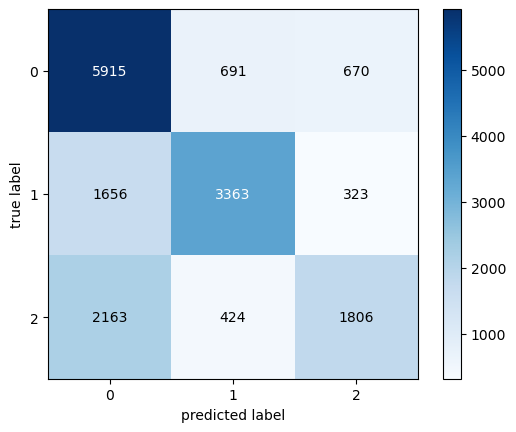

In [66]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Complement_vect,
                                colorbar=True)

plt.show();


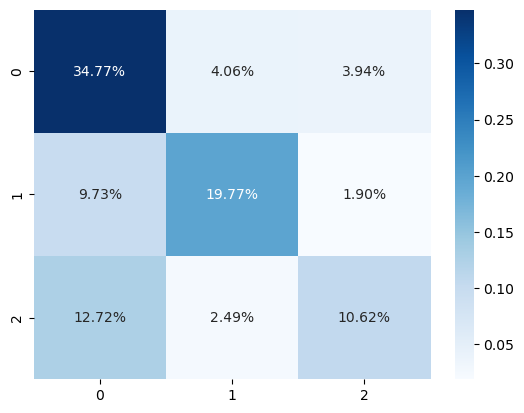

In [67]:
# percent
sns.heatmap(cf_matrix_Complement_vect/np.sum(cf_matrix_Complement_vect), annot=True, 
            fmt='.2%', cmap='Blues');


# Create NAIVE BAYES Gaussian
# not possible due to memory error


In [ ]:
# transform to avoid sparse matrix
# Convert sparse matrix to dense numpy array
# X_train_text_dense = X_train_text.toarray()


In [143]:
# from sklearn.naive_bayes import GaussianNB
# clf_gau_vect = GaussianNB()


In [ ]:
# clf_gau_vect.fit(X_train_text, Y_train)


In [ ]:
# get accuracy
# accuracyNB_Gaussian_vect = clf_gau_vect.score(X_test_text, y_test)
# accuracyNB_Gaussian_vect


In [ ]:
# get confusion matrix
# y_pred_NB_Gaussian_vect = clf_gau_vect.predict(X_test_text)
# pd.crosstab(y_test, y_pred_NB_Gaussian_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("Naive Bayes Gaussian vect classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian_vect))

# really bad overall


In [ ]:
# create confusion matrix
# cf_matrix_Gaussian_vect = confusion_matrix(y_test, y_pred_NB_Gaussian_vect)
# print(cf_matrix_Gaussian_vect)


# GradientBoosting Model


In [145]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier object
# GradBoost_vect = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


In [ ]:
# Fit the model on the training data
# GradBoost_vect.fit(X_train_text, Y_train)

# takes XXX minutes

In [153]:
# Make predictions on the test data
# y_pred_GradBoost_vect = GradBoost_vect.predict(X_test_text)


In [ ]:
# Evaluate the model
# accuracy_GradBoost_vect = accuracy_score(y_test, y_pred_GradBoost_vect)
# accuracy_GradBoost_vect

In [ ]:
# pd.crosstab(Y_test, y_pred_GradBoost_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("GradientBoosting vect classification report:\n ", classification_report (Y_test, y_pred_GradBoost_vect))


In [ ]:
# create confusion matrix
# cf_matrix_GradBoost_vect = confusion_matrix(Y_test, y_pred_GradBoost_vect)
# print(cf_matrix_GradBoost_vect)


# CatBoost Model

In [157]:
# import catboost as cb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Create a CatBoost classifier object
# catboost_vect = cb.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')


In [ ]:
# Fit the model on the training data
# catboost_vect.fit(X_train_text, Y_train)

# takes XXX minutes

In [ ]:
# get accuracy
# accuracy_CatBoost_vect = catboost_vect.score(X_test_text, Y_test)
# accuracy_CatBoost_vect

In [59]:
# Make predictions on the test data
# y_pred_catboost_vect = catboost_vect.predict(X_test_text)


In [ ]:
# pd.crosstab(Y_test, y_pred_catboost_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("CatBoost vect classification report:\n ", classification_report (y_test, y_pred_catboost_vect))


# XGBoost

In [68]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
# dtrain_vect = xgb.DMatrix(X_train_text, label=Y_train)
# dtest_vect = xgb.DMatrix(X_test_text, label=Y_test)


In [69]:
# Set the hyperparameters for XGBoost
# params_XGBoost = {
#    'max_depth': 3,
#    'eta': 0.1,
#    'objective': 'binary:logistic',
#    'eval_metric': 'logloss'
# }


In [70]:
# Train the model
# XGBoostmodel_vect = xgb.train(params_XGBoost, dtrain_vect, num_boost_round=100)


In [71]:
# Make predictions on the test data
# y_pred_XGBoost_vect = XGBoostmodel_vect.predict(dtest_vect)
# y_pred_binary_vect = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_vect]


In [ ]:
# Evaluate the model
# accuracy_XGBoost_vect = accuracy_score(Y_test, y_pred_binary_vect)
# accuracy_XGBoost_vect


In [ ]:
# Create crosstab
# pd.crosstab(Y_test, y_pred_XGBoost_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("XGBoost vect classification report:\n ", classification_report (y_test, y_pred_XGBoost))

# not possible

# CREATE KNN ON TEXT DATA
# TAKES 2 hours!


In [ ]:
# STEP 3: Instantiate the model
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 6)


In [ ]:
# STEP 4: Fit the model
# knn.fit(X_train_text_scaled, y_train)


In [ ]:
# STEP 5: Predict
# y_pred_knn_vect = knn.predict(X_test_text_scaled)


In [ ]:
# Evaluate
# from sklearn.metrics import accuracy_score, precision_score, recall_score 

# pd.crosstab(y_test, y_pred_knn_vect, rownames = ['Reality'], colnames = ['Prediction'])

### looks really bad!


In [ ]:
# STEP 8: Evaluate model with score
# get accuracy
# knn.score(X_test_text_scaled, y_test)


In [ ]:
# STEP 9: Evaluate model with classification report
# from sklearn.metrics import classification_report 

# print("KNN vect classification report:\n", classification_report (y_test, y_pred_knn_vect))

# quite bad overall...


# CREATE SVM MODEL ON TEXT DATA
# TAKES 3,5 HOURS


In [220]:
# Step 3: Instantiate model 
# from sklearn import svm
# clf_SVM_vect = svm.SVC(gamma=0.01, kernel="poly")


In [221]:
# Step 4: Fit the model on the training dataset
# clf_SVM_vect.fit(X_train_text, Y_train)

# takes 3,5 hours!!!


SVC(gamma=0.01, kernel='poly')

In [ ]:
# get accuracy
# SVM_vect_score = clf_SVM_vect.score(X_test_text, Y_test)

# takes 45 Minutes

# bad result


In [ ]:
# get confusion matrix
# y_pred_SVM_vect = clf_SVM_vect.predict(X_test_text)
# pd.crosstab(Y_test, y_pred_SVM_vect, rownames=["real"], colnames=["predict"])

# dauert 40 Minuten

In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("SVM vect classification report:\n ", classification_report (Y_test, y_pred_SVM_vect))


In [ ]:
# create confusion matrix
# cf_matrix_SVM_vect = confusion_matrix(Y_test, y_pred_SVM_vect)
# print(cf_matrix_SVM_vect)


# CREATE LOGISTIC REGRESSION MODEL ON TEXT DATA


In [ ]:
# needs standardization


In [68]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_vect = LogisticRegression(C=1.0)


In [69]:
# Step 4: Fit the model on the training dataset
clf_LogReg_vect.fit(X_train_text, Y_train)

# takes 1 minute

C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
# get accuracy
accuracy_logReg_vect = clf_LogReg_vect.score(X_test_text, Y_test)
accuracy_logReg_vect

# 0.723

0.7239433307859621

In [71]:
# get confusion matrix
y_pred_LogReg_vect = clf_LogReg_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_LogReg_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,5761,768,747
1.0,956,4049,337
2.0,1389,499,2505


In [72]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression vect classification report:\n ", classification_report (Y_test, y_pred_LogReg_vect))


Logistic Regression vect classification report:
                precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      7276
         1.0       0.76      0.76      0.76      5342
         2.0       0.70      0.57      0.63      4393

    accuracy                           0.72     17011
   macro avg       0.72      0.71      0.71     17011
weighted avg       0.72      0.72      0.72     17011



In [73]:
# create confusion matrix
cf_matrix_LogReg_vect = confusion_matrix(Y_test, y_pred_LogReg_vect)
print(cf_matrix_LogReg_vect)


[[5761  768  747]
 [ 956 4049  337]
 [1389  499 2505]]


# COMPARE MODELS ON TEXT DATA ONLY

In [74]:
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect)
print("Naive Bayes Bernoulli vect accuracy score :", accuracyNB_Bernoulli_vect)
print("Naive Bayes Multinomial vect accuracy score :", accuracyNB_Multinomial_vect)
print("Naive Bayes Complement vect accuracy score :", accuracyNB_Complement_vect)
# print("GradientBoosting vect accuracy score :", accuracy_GradBoost_vect)
# print("CatBoost vect accuracy score :", accuracy_CatBoost_vect)
# print("XGBoost vect accuracy score :", accuracy_XGBoost_vect)
# print("KNN vect accuracy score :", accuracy_knn_vect)
# print("SVM vect accuracy score :", accuracy_SVM_vect)
print("Logistic Regression vect accuracy score :", accuracy_logReg_vect)


LightGBM vect accuracy score : 0.5466462876961966
Naive Bayes Bernoulli vect accuracy score : 0.5710422667685615
Naive Bayes Multinomial vect accuracy score : 0.6023749338663218
Naive Bayes Complement vect accuracy score : 0.6515783904532362
Logistic Regression vect accuracy score : 0.7239433307859621


In [75]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_vect  = {'LightGBM vect':accuracy_LightGBM_vect,'Naive Bayes Bernoulli vect':accuracyNB_Bernoulli_vect,
        'Naive Bayes Multinomial vect':accuracyNB_Multinomial_vect,
        'Naive Bayes Complement vect':accuracyNB_Complement_vect,
#        'Gradient Boosting vect':accuracy_GradBoost_vect,
#        'CatBoost vect':accuracy_CatBoost_vect,  
#        'XGBoost vect':accuracy_XGBoost_vect, 
        'Logistic Regression vect':accuracy_logReg_vect}


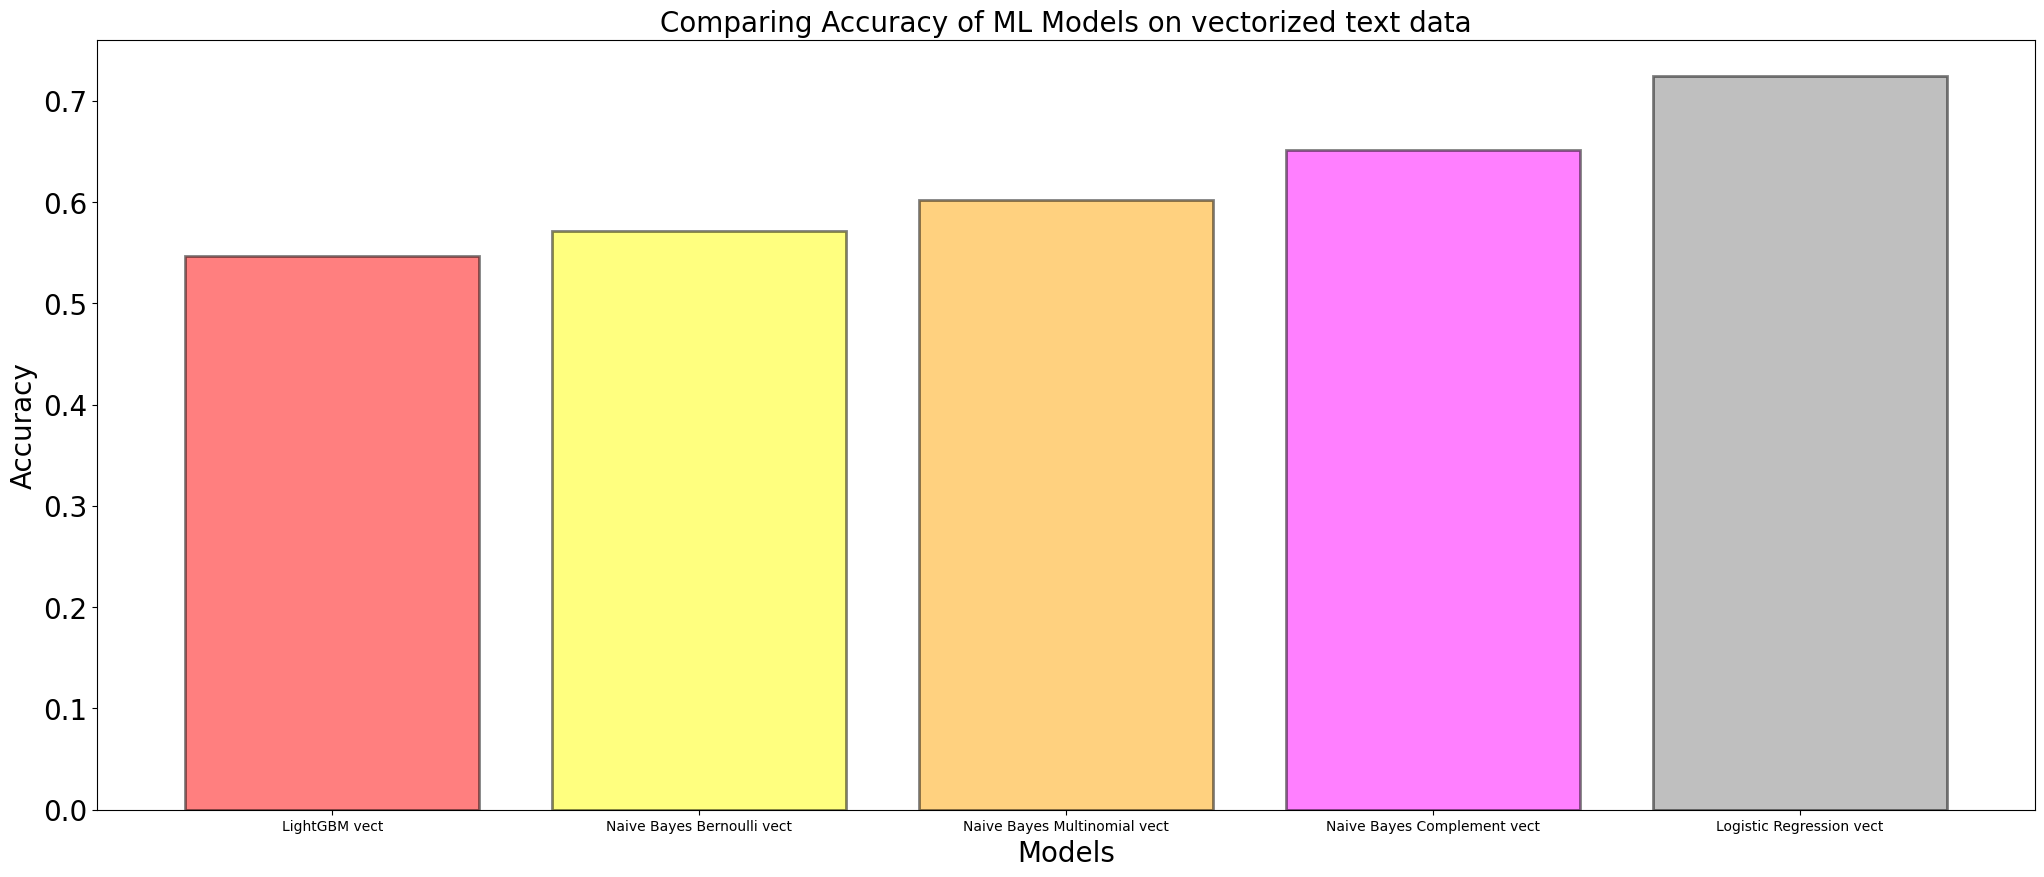

In [76]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(25,10))
plt.title('Comparing Accuracy of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow','orange','magenta', 
        #'white', 'purple', 'black', 
        'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect.keys(),labels_vect.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);

